# Using Python for STATS

## PART 1: What can python do for you?

### Python as a calculator

In [1]:
2.1 + 3.4

5.5

In [44]:
num1 = 2.1
num2 = 3.4

num1 + num2

5.5

In [46]:
(num1 + num2) / 2

2.75

But what if we had to compute the average from a whole list of numbers...

#### Powerful primitives and built-ins

In [20]:
grades = [80, 90, 70, 60]

avg = sum(grades) / len(grades)
avg

75.0

#### For loops

In [21]:
total = 0
for grade in grades:
    total = total + grade
avg = total / len(grades)
avg

75.0

#### Math functions and Python functions

In math, 
a function is a mapping from input values (usually denoted x) to output values (usually denoted y).

Consider the mapping that doubles the input and adds five to it,
which we can express as the math function $f(x) = 2x+5$.
For any input $x$,
the output of the function $f$ is denoted $f(x)$ and is equal to $2x+5$.
For example, $f(3)$ describes the output of the function when the input is $x=3$,
and it is equal to $2(3)+5 = 6 + 5 = 11$.

The Python equivalent of the math function $f(x) = 2x+5$ is shown below. 



In [47]:
def f(x):
    y = 2*x + 5
    return y

To **define** the Python function called `f`,
we use the `def` keyword,
then write all the function calculations in an indented block
that ends with a `return` statement for the output of the function.

To **call** the function `f` with input `x`, we simply writhe `f(x)` in Python,
which is the same as the math notation we use for "evaluate the function at the value x."

In [48]:
f(3)

11

The mean is defined as $\mathbf{Mean}(\mathbf{x}) = \frac{1}{n}  \sum_{i=1}^{i=n} x_i$,
where $\mathbf{x} = [x_1, x_2, x_3, \ldots, x_n]$ is a list of values.

In [26]:
def mean(sample):
    total = 0
    for xi in sample:
        total = total + xi
    avg = total / len(sample)
    return avg

In [27]:
mean(grades)

75.0

In [14]:
DATA_URL = "https://raw.githubusercontent.com/minireference/noBSstatsnotebooks/main/datasets/epriceswide.csv"

import pandas as pd
epriceswide = pd.read_csv(DATA_URL)
epriceswide

,East,West
0,7.7,11.8
1,5.9,10.0
2,7.0,11.0
3,4.8,8.6
4,6.3,8.3
5,6.3,9.4
6,5.5,8.0
7,5.4,6.8
8,6.5,8.5


In [19]:
pricesW = epriceswide["West"]
pricesE = epriceswide["East"]

In [18]:
# # ALT. we can input data by specifying lists of values
# pricesW = pd.Series([11.8,10,11,8.6,8.3,9.4,8,6.8,8.5])
# pricesE = pd.Series([7.7,5.9,7,4.8,6.3,6.3,5.5,5.4,6.5])

### Descriptive statistics

In [10]:
pricesW.mean()

9.155555555555557

In [52]:
pricesW.describe()

count     9.000000
mean      9.155556
std       1.562139
min       6.800000
25%       8.300000
50%       8.600000
75%      10.000000
max      11.800000
Name: West, dtype: float64

### Data visualization

In [61]:
import seaborn as sns

<AxesSubplot: xlabel='West'>

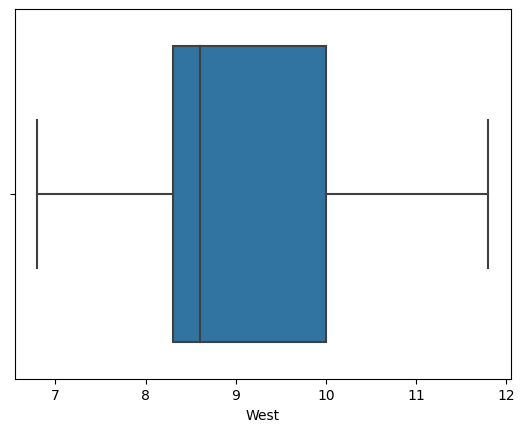

In [65]:
sns.boxplot(x=pricesW)

<AxesSubplot: xlabel='West'>

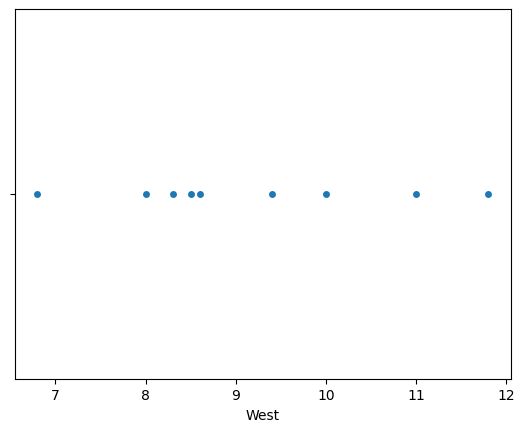

In [61]:
sns.stripplot(x=pricesW, jitter=0)

<AxesSubplot: xlabel='West', ylabel='Count'>

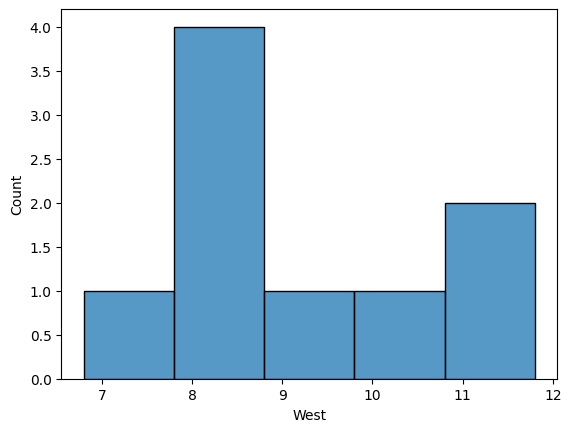

In [66]:
sns.histplot(x=pricesW)

## Understanding probability distributions

### Building computer models for probability distributions

The standard normal distribution $Z \sim \mathcal{N}(\mu=0,\sigma=1)$ has the probability density function:

$$
    f_Z(z) = \tfrac{1}{\sqrt{2\pi}} e^{ - \frac{1}{2}z^2}.
$$

The standard normal is a special case of the general normal $\mathcal{N}(\mu, \sigma)$
where $\mu$ is the mean and $\sigma$ is the standard deviation.


In [79]:
import numpy as np

def fZ(z):
    const = 1 / np.sqrt(2*np.pi)
    exp = np.exp(-1/2 * z**2)
    return const*exp

In [80]:
fZ(1)

0.24197072451914337

$N \sim \mathcal{N}(\mu,\sigma)$ has the probability density function:

$$
    f_N(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 },
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.
We use the notation $\mathcal{N}(\mu, \sigma)$ to describe the distribution as math,
and `norm(mu,sigma)` to describe as computer model.

In [83]:
import numpy as np

def fN(x, mu=0, sigma=1):
    const = 1 / (sigma*np.sqrt(2*np.pi))
    exp = np.exp(-1/2 * ( (x-mu)/sigma )**2 )
    return const*exp

In [84]:
fN(3, 2, 3)

0.12579440923099774

### Predefined computer models

We create a computer model for the general normal distribution 
$\mathcal{N}(\mu, \sigma)$ by calling `norm(mu,sigma)`,
where `norm` is `scipy.stats.norm`.

In [82]:
from scipy.stats import norm

rvZ = norm(0,1)
rvZ

### Probability model visualizations

<AxesSubplot: >

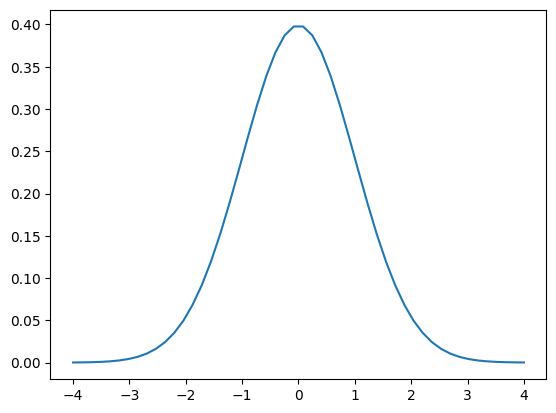

In [86]:
zs = np.linspace(-4, 4)
fZs = rvZ.pdf(zs)

sns.lineplot(x=zs, y=fZs)

## Doing probability calculations

In [95]:
from scipy.integrate import quad
quad(rvZ.pdf, 2, np.inf)[0]

0.02275013194817598

In [96]:
quad(rvZ.pdf, -np.inf, -2)[0]

0.02275013194817598

for continuous need integral

In [97]:
1 - rvZ.cdf(2)

0.02275013194817921

## Running statistical simulations

### Sampling distributions

### Verifying p-values

### Verifying confidence intervals

## Resampling methods

### Bootstrap estimation

### Permutation test

## Data cleaning

## Statistics procedures as code

# CUT MATERIAL

#### Pandas equivalent

In [50]:
import pandas as pd
gseries = pd.Series(grades)
gseries.mean()

75.0